In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Arquivo contendo quantidades de óbitos por ano e tipos de causas, seguindo classificação da CID-10
obitos = pd.read_csv("C:\\Users\\maste\\Downloads\\Python-Datasus-master\\Python-Datasus-master\\Obitos-Capitulo-CID10-2015-2020.csv", sep = ';', index_col=0)
obitos

,Cap I,Cap II,Cap III,Cap IV,Cap V,Cap VI,Cap VII,Cap VIII,Cap IX,Cap X,Cap XI,Cap XII,Cap XIII,Cap XIV,Cap XV,Cap XVI,Cap XVII,Cap XVIII,Cap XX,Total
Ano do Óbito,,,,,,,,,,,,,,,,,,,,
2015,55022,209780,6506,76235,12558,34721,21,147,349642,149541,64202,4970,5385,36549,1896,22162,10989,71713,152136,1264175
2016,57188,215217,6878,78075,12674,36870,20,173,362091,158041,66044,5874,5787,39367,1814,21049,10882,75869,155861,1309774
2017,54874,221821,6622,79662,12858,38786,19,179,358882,155620,66052,6100,5912,40470,1874,21458,10995,71822,158657,1312663
2018,54679,227920,6601,81365,13697,41035,21,169,357770,155191,67316,6273,6153,43428,1862,20764,11156,70505,150814,1316719
2019,56666,235301,7068,83485,14526,45235,23,206,364132,162005,68770,7152,6506,47566,1726,20354,11308,74972,142800,1349801
2020,264666,227519,6622,91055,17188,44881,25,158,354093,150374,66131,6815,6060,44994,1989,18815,9536,97436,144382,1552739


In [7]:
# Arquivo contendo ocorrências de óbitos por CID-10, carregado com o objetivo de se obter
# as descrições dos capítulos
obito2020 = pd.read_csv("C:\\Users\\maste\\Downloads\\Python-Datasus-master\\Python-Datasus-master\\Obitos-Capitulo-CID10-2020.csv", sep = ';')
obito2020

,Capítulo CID-10,Óbitos p/Ocorrênc
0,I. Algumas doenças infecciosas e parasitárias,264666
1,II. Neoplasias (tumores),227519
2,III. Doenças sangue órgãos hemat e transt imun...,6622
3,IV. Doenças endócrinas nutricionais e metaból...,91055
4,V. Transtornos mentais e comportamentais,17188
5,VI. Doenças do sistema nervoso,44881
6,VII. Doenças do olho e anexos,25
7,VIII.Doenças do ouvido e da apófise mastóide,158
8,IX. Doenças do aparelho circulatório,354093
9,X. Doenças do aparelho respiratório,150374


In [9]:
# Gerando dicionário com descrições dos Capítulos, a partir do DataFrame obito2020
capitulos={}
for linha in obito2020['Capítulo CID-10']:
    pos = linha.find('.')
    chave=linha[0:pos]
    valor=linha[pos+1:]
    capitulos[chave] = valor.lstrip()
capitulos['Total'] = 'Nacional'
capitulos

{'I': 'Algumas doenças infecciosas e parasitárias',
 'II': 'Neoplasias (tumores)',
 'III': 'Doenças sangue órgãos hemat e transt imunitár',
 'IV': 'Doenças endócrinas nutricionais e metabólicas',
 'V': 'Transtornos mentais e comportamentais',
 'VI': 'Doenças do sistema nervoso',
 'VII': 'Doenças do olho e anexos',
 'VIII': 'Doenças do ouvido e da apófise mastóide',
 'IX': 'Doenças do aparelho circulatório',
 'X': 'Doenças do aparelho respiratório',
 'XI': 'Doenças do aparelho digestivo',
 'XII': 'Doenças da pele e do tecido subcutâneo',
 'XIII': 'Doenças sist osteomuscular e tec conjuntivo',
 'XIV': 'Doenças do aparelho geniturinário',
 'XV': 'Gravidez parto e puerpério',
 'XVI': 'Algumas afec originadas no período perinatal',
 'XVII': 'Malf cong deformid e anomalias cromossômicas',
 'XVIII': 'Sint sinais e achad anorm ex clín e laborat',
 'XX': 'Causas externas de morbidade e mortalidade',
 'Total': 'Nacional'}

In [11]:
alterar_cap = dict(zip(obitos.columns, capitulos.keys()))
alterar_cap

{'Cap I': 'I',
 'Cap II': 'II',
 'Cap III': 'III',
 'Cap IV': 'IV',
 'Cap V': 'V',
 'Cap VI': 'VI',
 'Cap VII': 'VII',
 'Cap VIII': 'VIII',
 'Cap IX': 'IX',
 'Cap X': 'X',
 'Cap XI': 'XI',
 'Cap XII': 'XII',
 'Cap XIII': 'XIII',
 'Cap XIV': 'XIV',
 'Cap XV': 'XV',
 'Cap XVI': 'XVI',
 'Cap XVII': 'XVII',
 'Cap XVIII': 'XVIII',
 'Cap XX': 'XX',
 'Total': 'Total'}

In [13]:
# Renomeando os nomes dos capítulos originais, simplificando-os
obitos = obitos.rename(columns=alterar_cap)
obitos

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XX,Total
Ano do Óbito,,,,,,,,,,,,,,,,,,,,
2015,55022,209780,6506,76235,12558,34721,21,147,349642,149541,64202,4970,5385,36549,1896,22162,10989,71713,152136,1264175
2016,57188,215217,6878,78075,12674,36870,20,173,362091,158041,66044,5874,5787,39367,1814,21049,10882,75869,155861,1309774
2017,54874,221821,6622,79662,12858,38786,19,179,358882,155620,66052,6100,5912,40470,1874,21458,10995,71822,158657,1312663
2018,54679,227920,6601,81365,13697,41035,21,169,357770,155191,67316,6273,6153,43428,1862,20764,11156,70505,150814,1316719
2019,56666,235301,7068,83485,14526,45235,23,206,364132,162005,68770,7152,6506,47566,1726,20354,11308,74972,142800,1349801
2020,264666,227519,6622,91055,17188,44881,25,158,354093,150374,66131,6815,6060,44994,1989,18815,9536,97436,144382,1552739


In [15]:
# Transposição
obitos = obitos.T
obitos

Ano do Óbito,2015,2016,2017,2018,2019,2020
I,55022,57188,54874,54679,56666,264666
II,209780,215217,221821,227920,235301,227519
III,6506,6878,6622,6601,7068,6622
IV,76235,78075,79662,81365,83485,91055
V,12558,12674,12858,13697,14526,17188
VI,34721,36870,38786,41035,45235,44881
VII,21,20,19,21,23,25
VIII,147,173,179,169,206,158
IX,349642,362091,358882,357770,364132,354093
X,149541,158041,155620,155191,162005,150374


In [17]:
# Label para o eixo X
anos = list(obitos.columns)
xanos = np.arange(len(anos))

In [19]:
# Funcao para formatar quantidades em milhoes
def milhoes(x, pos):
    return '{:1.2f}M'.format(x*1e-6)

In [21]:
plt.rc('figure', figsize = (15,30))

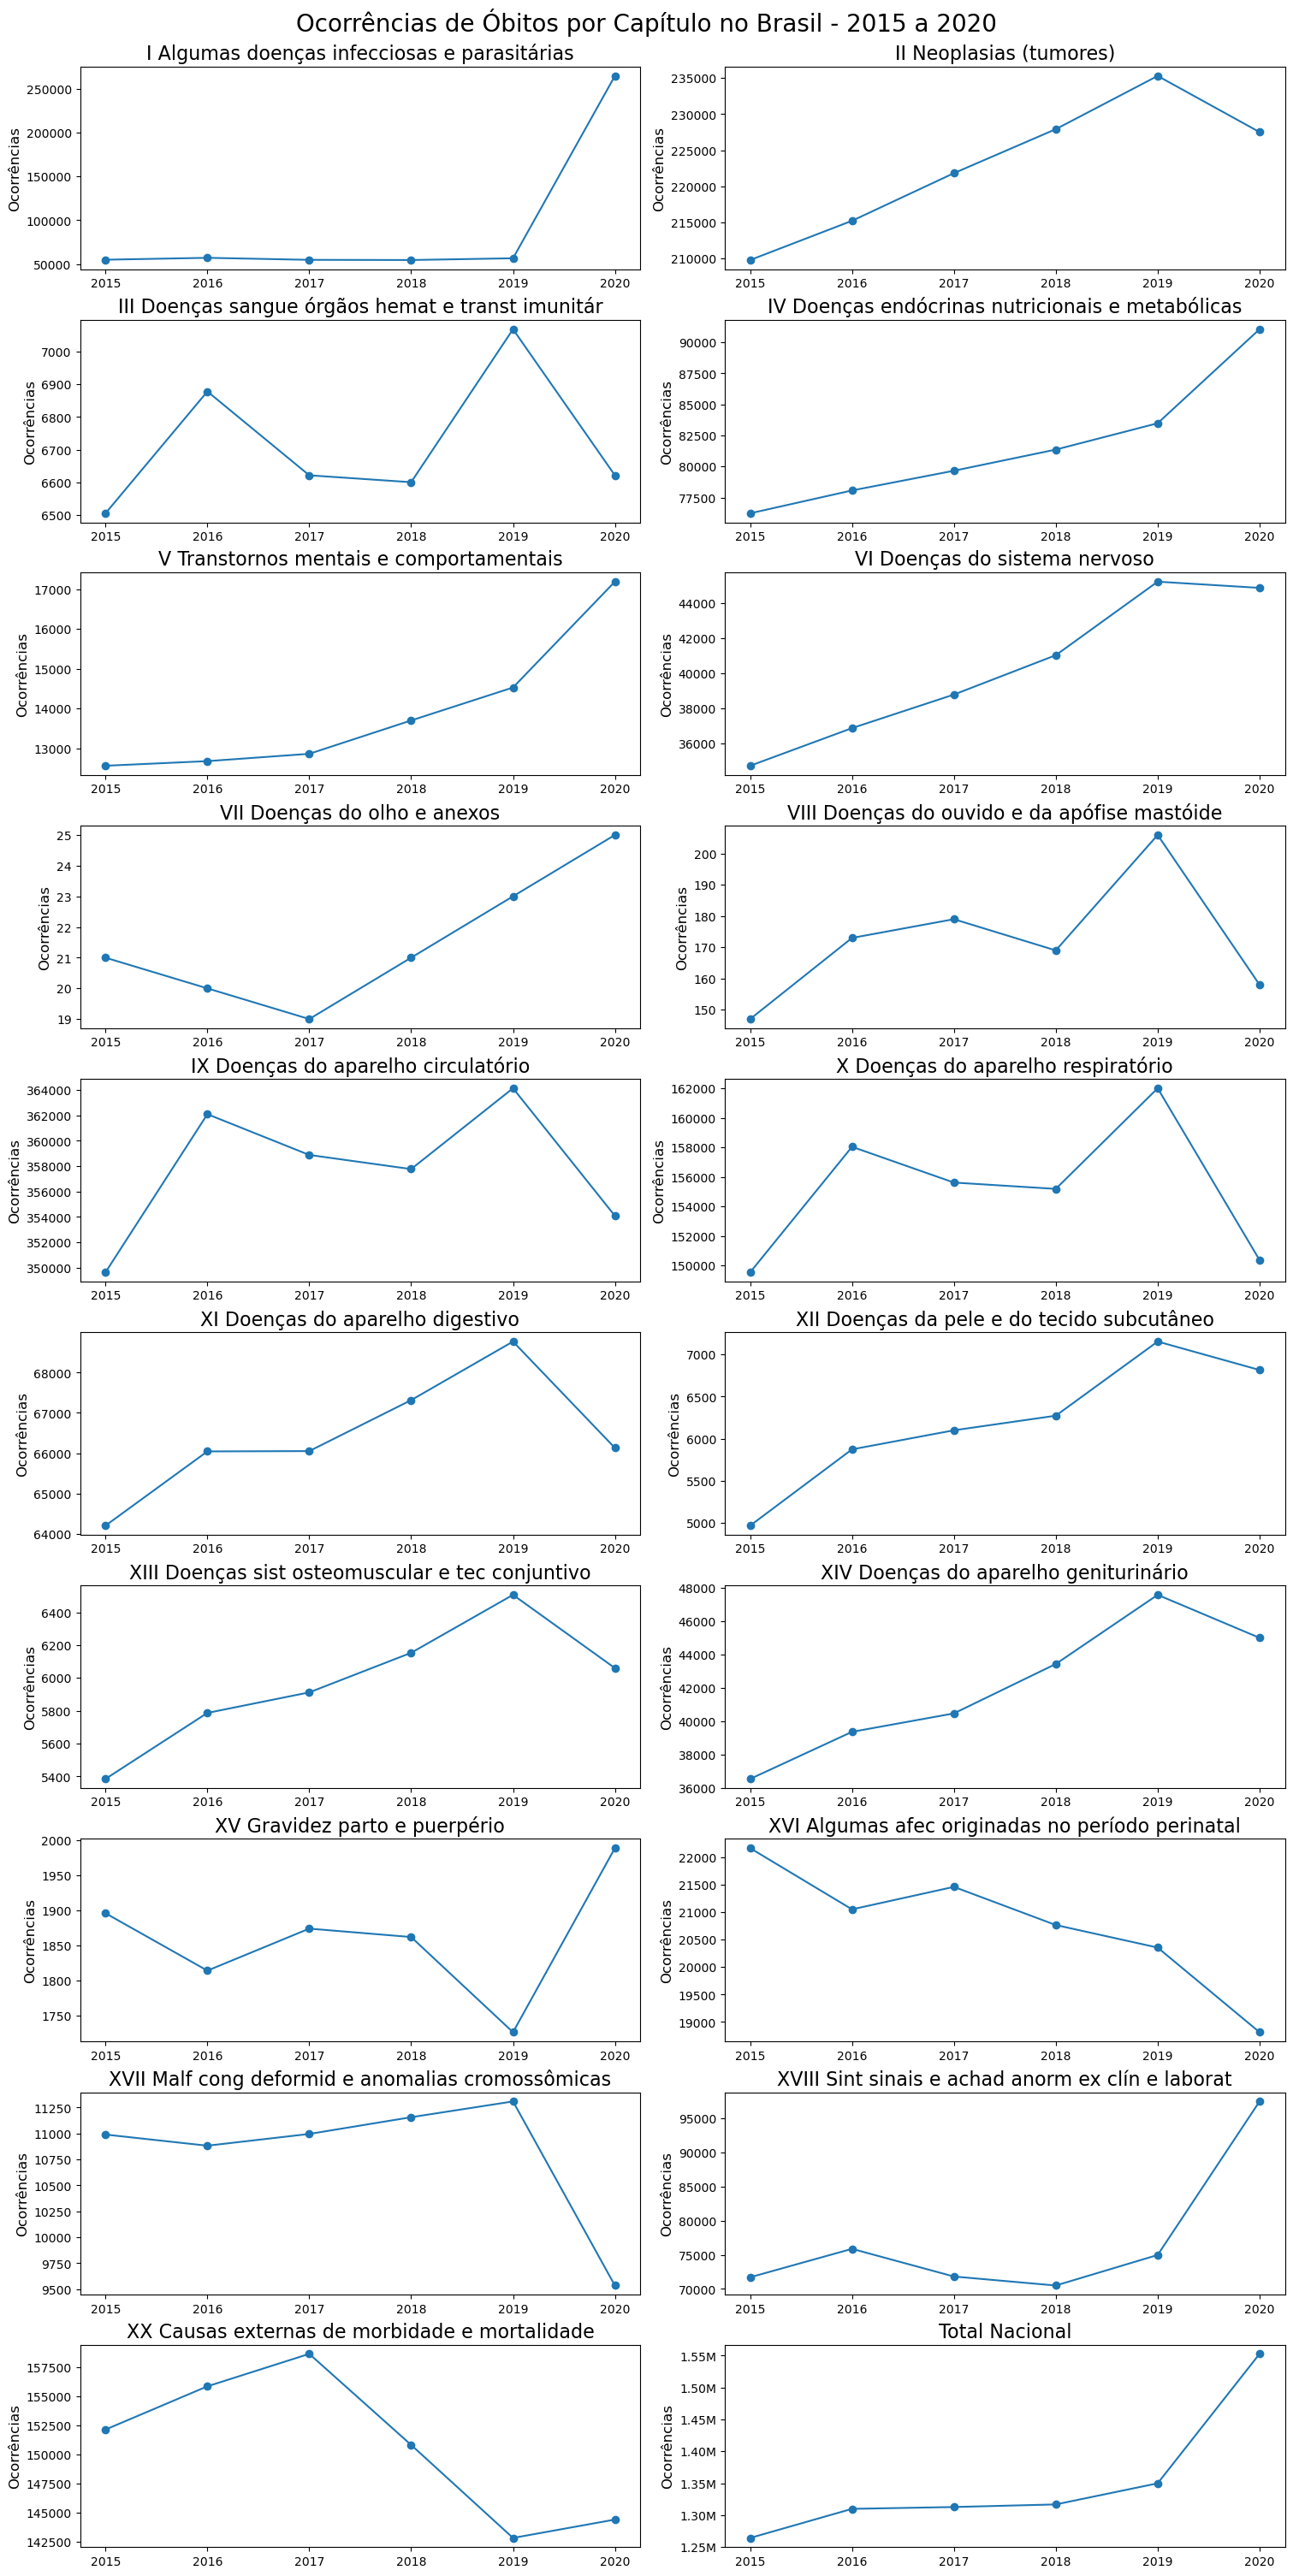

In [23]:
# Montagem dos gráficos de linha: Ocorrências por ano para cada causa de óbito
fig, axs = plt.subplots(nrows=10, ncols=2, constrained_layout=True)
idx1 = 0
idx2 = 0
for index, valores in obitos.iterrows():
    axs[idx1, idx2].plot(anos, valores, marker='o')
    axs[idx1, idx2].set_ylabel('Ocorrências', {'fontsize': 12})
    axs[idx1, idx2].set_title(index + ' ' + capitulos[index], {'fontsize': 16})
    if(index=='Total'):
        axs[idx1, idx2].yaxis.set_major_formatter(milhoes)
    if(idx2==0):
        idx2=1
    else:
        idx2=0
        idx1+=1
fig.suptitle('Ocorrências de Óbitos por Capítulo no Brasil - 2015 a 2020', fontsize=20)
plt.show()

In [27]:
plt.rc('figure', figsize = (12,15))

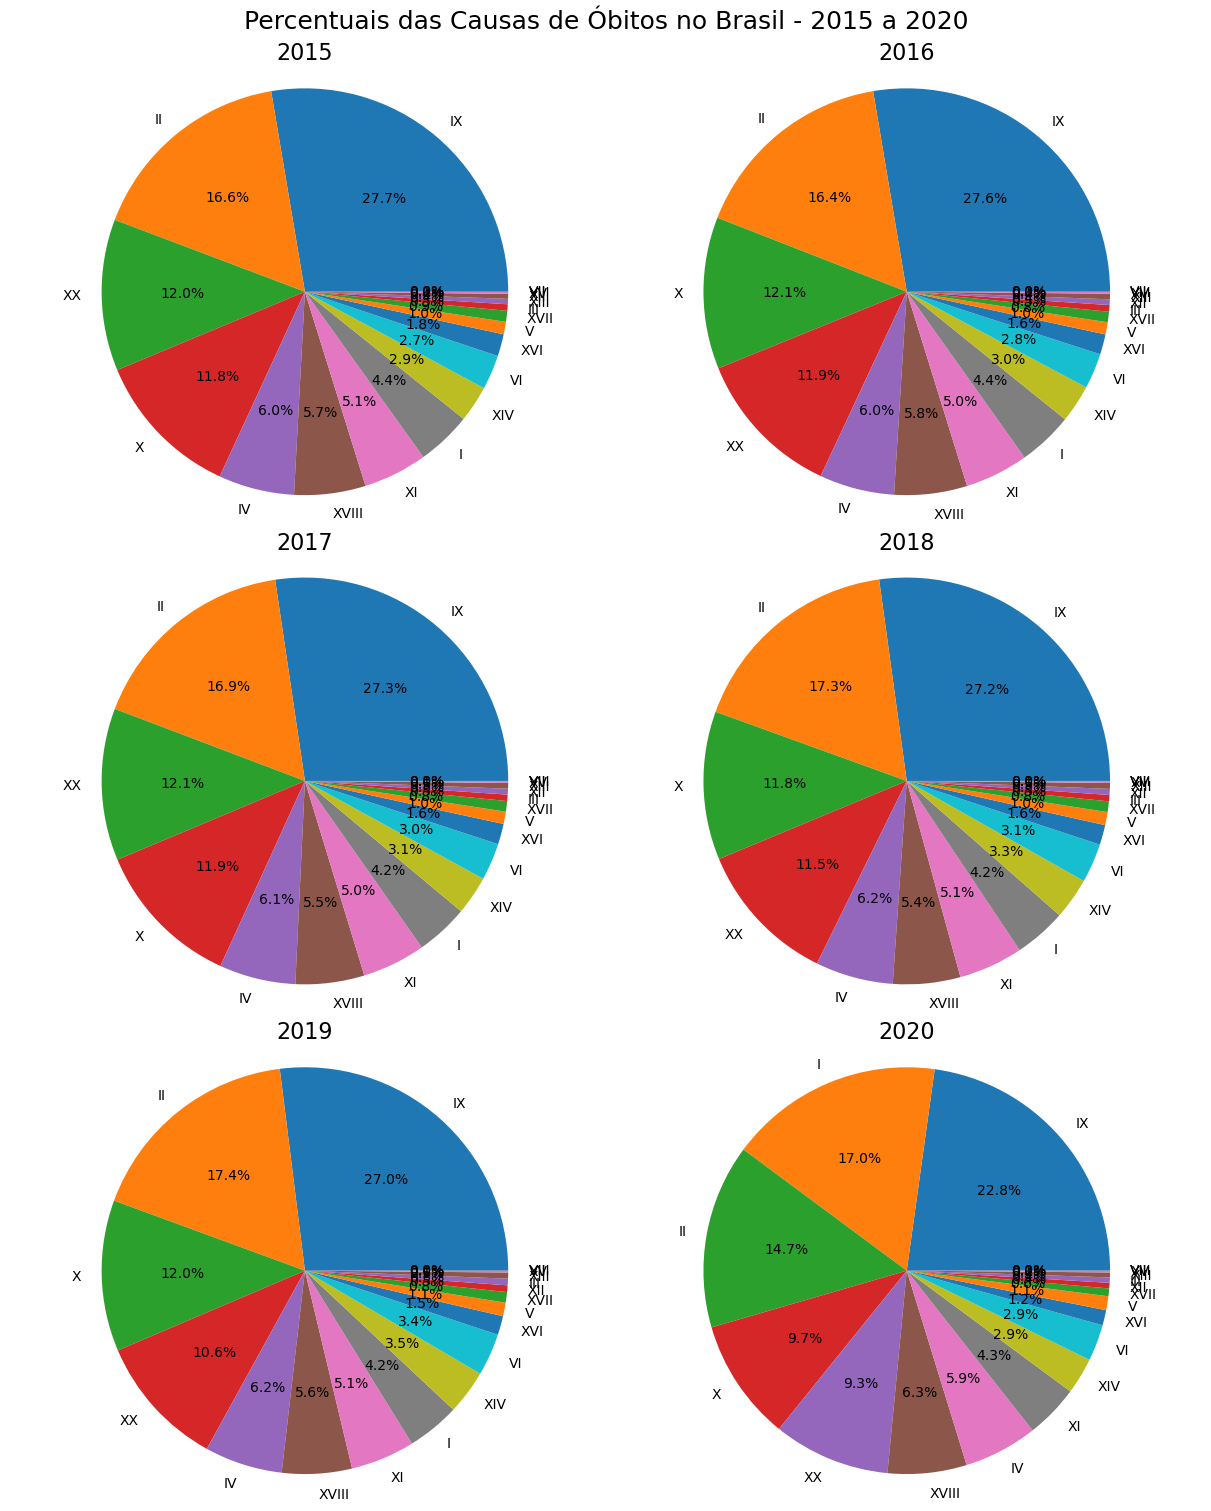

In [154]:
# Montagem de gráficos de pizza: Percentuais das causas de óbitos, de 2015 a 2020
fig, axs = plt.subplots(nrows=3, ncols=2, constrained_layout=True)
idx1 = 0
idx2 = 0
for ano in tuple(obitos.columns):
    dfano = pd.DataFrame(list(obitos[ano].values[:-1]), list(obitos.index[:-1]))
    dfano.sort_values(by=0, ascending=False, inplace=True)
    labels = tuple(dfano.index)
    sizes = list(dfano[0].values)
    axs[idx1, idx2].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
    axs[idx1, idx2].set_title(str(ano), {'fontsize': 16})
    axs[idx1, idx2].axis('equal')
    if(idx2==0):
        idx2=1
    else:
        idx2=0
        idx1+=1
fig.suptitle('Percentuais das Causas de Óbitos no Brasil - 2015 a 2020', fontsize=18)
plt.show()

In [156]:
fig.savefig('graficos_pizza.png', dpi = 300, bbox_inches = 'tight')

In [158]:
# Arquivo contendo quantidades de nascimentos por ano
nascimentos = pd.read_csv("C:\\Users\\maste\\Downloads\\Python-Datasus-master\\Python-Datasus-master\\Nascimentos-2015-2020.csv", sep = ';', index_col=0)
nascimentos

,Nascim p/ocorrênc
Ano do nascimento,
2015,3017668
2016,2857800
2017,2923535
2018,2944932
2019,2849146
2020,2726025


In [160]:
nascimentos = nascimentos.T
nascimentos

Ano do nascimento,2015,2016,2017,2018,2019,2020
Nascim p/ocorrênc,3017668,2857800,2923535,2944932,2849146,2726025


In [162]:
total_nasc = []
for i in nascimentos.values.tolist()[0]:
    total_nasc.append(i)

In [164]:
total_obt = list(obitos.values[len(obitos)-1])

In [166]:
anos = list(nascimentos.columns)

In [168]:
plt.rc('figure', figsize = (10,6))

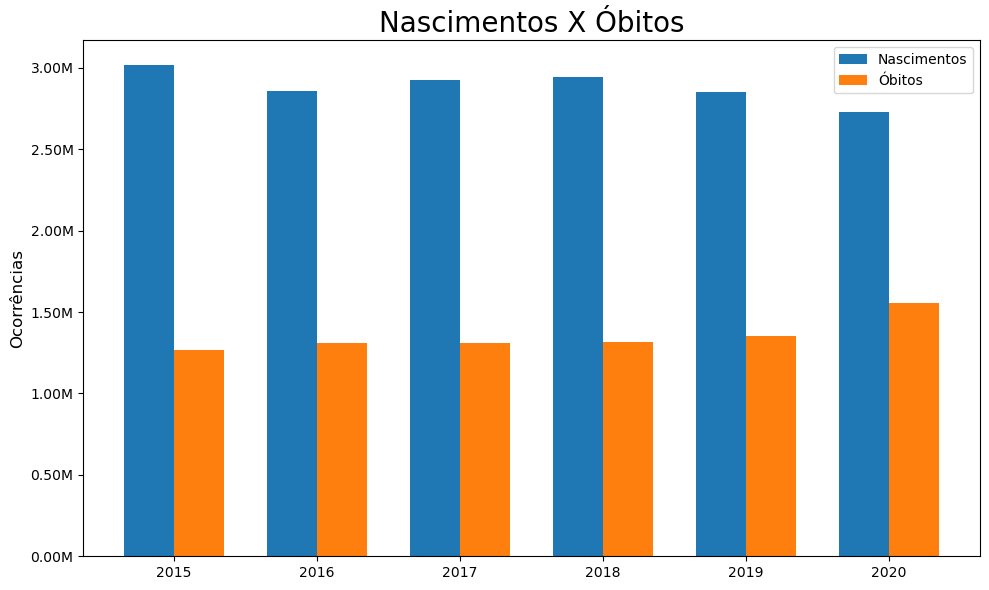

In [170]:
# Montagem do gráfico de barras: Ocorrências de nascimentos X óbitos por ano
x = np.arange(len(anos))
width = 0.35
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(milhoes)
rects1 = ax.bar(x - width/2, total_nasc, width, label='Nascimentos')
rects2 = ax.bar(x + width/2, total_obt, width, label='Óbitos')
ax.set_ylabel('Ocorrências', {'fontsize': 12})
ax.set_title('Nascimentos X Óbitos', {'fontsize': 20})
ax.set_xticks(x, anos)
ax.legend()
fig.tight_layout()
plt.show()